In [ ]:
import numpy as np
from numpy import log, dot, e, shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_classification(n_features = 4, n_classes = 2)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.1)

In [ ]:
print(X.shape)
print(X_tr.shape)
print(X_te.shape)
print(y_tr.shape)
print(y_te.shape)

(100, 4)
(90, 4)
(10, 4)
(90,)
(10,)


In [ ]:
y

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
mu = np.mean(X, axis = 0)
mu

array([-0.05158798,  0.00338056,  0.16319359,  0.11334914])

In [ ]:
std = np.std(X, axis = 0)
std

array([0.67096506, 0.46394   , 1.37051744, 1.33157821])

In [ ]:
norm = (X - mu)/std
norm.shape

(100, 4)

In [ ]:
def standardize(X_tr):
  mu = np.mean(X_tr, axis = 0)
  std = np.std(X_tr, axis = 0)
  X_tr = (X_tr - mu)/std

In [ ]:
def F1_score(y, y_hat):
  tp, tn, fp, fn = 0, 0, 0, 0
  for i in range(len(y)):
    if y[i] == 1 and y_hat[i] == 1:
      tp += 1
    elif y[i] == 1 and y_hat[i] == 0:
      fn += 1
    elif y[i] == 0 and y_hat[i] == 1:
      fp += 1
    elif y[i] == 0 and y_hat[i] == 0:
      tn += 1
  precision = tp/(tp + fp)
  recall = tp/(tp+fn)
  f1_score = 2*precision*recall/(precision+recall)
  return f1_score

In [ ]:
# def initialize(X):
#   weights = np.zeros((shape(X)[1] + 1, 1))
#   X = np.c_[np.ones((shape(X)[0], 1)), X]
#   return weights, X

In [ ]:
# def sigmoid(z):
#   s = 1/(1+np.exp(-z))
#   return s

In [ ]:
# def cost(X, y, w):
#   h = sigmoid(np.dot(X, w.T))
#   first = -y*np.log(h)
#   second = -(1-y)*np.log(1-h)
#   c = (first + second)/len(y)
#   return s

In [ ]:
# def fit(X, y, alpha = 0.001, iter = 100):
#   params, X = initialize(X)
#   cost_list = np.zeros(iter,)
#   for i in range(iter):
#     params = params - alpha * dot(X.T, sigmoid(dot(X, params)) - np.reshape(y, (len(y),1)))
#     cost_list[i] = cost(params)
#   params = params
#   return cost_list

In [ ]:
class LogisticRegression:

  def sigmoid(self, z):
    sig = 1/(1+np.exp(-z))
    return sig
  
  def initialize(self, X):
    weights = np.zeros((shape(X)[1]+1, 1))
    X = np.c_[np.ones((shape(X)[0], 1)), X]
    return weights, X

  def fit(self, X, y, alpha = 0.001, iter = 400):
    weights, X = self.initialize(X)

    def cost(theta):
      z = dot(X, theta)
      h = self.sigmoid(z)
      cost0 = y.T.dot(log(h))
      cost1 = (1 - y).T.dot(log(1-h))
      cost = -((cost1 + cost0))/len(y)
      return cost

    cost_list = np.zeros(iter,)

    for i in range(iter):
      weights = weights - alpha * dot(X.T, self.sigmoid(dot(X, weights)) - np.reshape(y, (len(y), 1)))
      cost_list[i] = cost(weights)
    self.weights = weights
    return cost_list
  
  def predict(self, X):
    z = dot(self.initialize(X)[1], self.weights)
    lis = []
    for i in self.sigmoid(z):
      if(i > 0.5):
        lis.append(1)
      else:
        lis.append(0)
    
    return lis

In [ ]:
standardize(X_tr)
standardize(X_te)
reg = LogisticRegression()

In [ ]:
model = reg.fit(X_tr, y_tr)

In [ ]:
w = reg.weights
w

array([[-0.15937508],
       [-0.81285576],
       [ 0.34304487],
       [ 1.8590888 ],
       [ 0.22742363]])

In [ ]:
y_pred_test_data = reg.predict(X_te)
y_pred_train_data = reg.predict(X_tr)

In [ ]:
f1_score_tr = F1_score(y_tr, y_pred_train_data)
f1_score_te = F1_score(y_te, y_pred_test_data)

In [ ]:
print(f1_score_tr)
print(f1_score_te)

0.8723404255319149
0.6666666666666666


In [ ]:
f1_score_tr_list = []
f1_score_te_list = []
for i in range(600):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.1)
    standardize(X_tr)
    standardize(X_te)
    reg = LogisticRegression()
    model = reg.fit(X_tr, y_tr)
    y_pred_test_data = reg.predict(X_te)
    y_pred_train_data = reg.predict(X_tr)
    f1_score_tr = F1_score(y_tr, y_pred_train_data)
    f1_score_te = F1_score(y_te, y_pred_test_data)
    f1_score_tr_list.append(f1_score_tr)
    f1_score_te_list.append(f1_score_te)

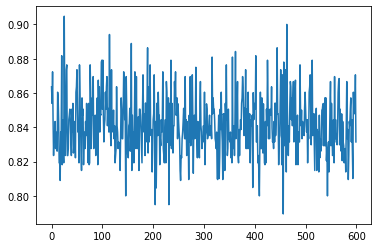

In [ ]:
plt.plot(np.arange(len(f1_score_tr_list)), f1_score_tr_list)

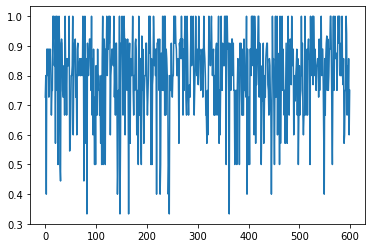

In [ ]:
plt.plot(np.arange(len(f1_score_te_list)), f1_score_te_list)

In [ ]:
np.mean(f1_score_tr_list)

0.8413614207359968

In [ ]:
np.mean(f1_score_te_list)

0.7990835985909515